# 0. 

기본 모듈

In [1]:
!pip install holiday
!pip install prophet
!pip install pystan~=2.14
!pip install fbprophet 
!pip install statsmodels==0.11.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 92 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.0 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639000 sha256=4c95c24c39c101acbe6912c6effddad6d03e7cd6d02b9369f63eea31bbce5399
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found e

In [2]:
#나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,723 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
# Prophet Library
from fbprophet import Prophet

# Prophet 시각화 도구
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import gc
import math
import os.path
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime
from dateutil import parser
from tqdm import tqdm
import copy
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import datetime
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. 데이터 불러오기

In [2]:
#matplotlib font 설정
import matplotlib .pyplot as plt
plt.rc('font', family='NanumGothic')

In [3]:
캠벨 = pd.read_csv('/content/drive/MyDrive/프로젝트 마켓컬리/Data캠벨얼리end.csv') 
팽이 = pd.read_csv('/content/drive/MyDrive/프로젝트 마켓컬리/데이터/샤인마스캇 Final.csv') 
대파 = pd.read_csv('/content/drive/MyDrive/프로젝트 마켓컬리/Data대파end.csv') 
토마토 = pd.read_csv('/content/drive/MyDrive/프로젝트 마켓컬리/Data토마토end.csv') 
깻잎= pd.read_csv('/content/drive/MyDrive/프로젝트 마켓컬리/Data깻잎end.csv') 
df = pd.read_csv('/content/drive/MyDrive/프로젝트 마켓컬리/Data합본.csv')

In [4]:
display(df.head(2))
display(깻잎.head(2))

,date,요일,토마토_거래량(kg),토마토_가격(원/kg),토마토_거래량의_1주전_평균,토마토_가격의_1주전_평균,토마토_거래량의_2주전_평균,토마토_가격의_2주전_평균,계절,깻잎_거래량(kg),...,캠벨얼리_거래량의_1주전_평균,캠벨얼리_가격의_1주전_평균,캠벨얼리_거래량의_2주전_평균,캠벨얼리_가격의_2주전_평균,샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),샤인마스캇_거래량의_1주전_평균,샤인마스캇_가격의_1주전_평균,샤인마스캇_거래량의_2주전_평균,샤인마스캇_가격의_2주전_평균
0,2016-01-01,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,5,30950.0,1621.0,30950.0,1621.0,30950.0,1621.0,0.0,4374.9,...,880.0,2014.0,880.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0


,date,요일,깻잎_거래량(kg),깻잎_가격(원/kg),깻잎_거래량의_1주전_평균,깻잎_가격의_1주전_평균,깻잎_거래량의_2주전_평균,깻잎_가격의_2주전_평균,계절
0,2016-01-01,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,5,4374.9,13242.0,4374.9,13242.0,4374.9,13242.0,0.0


In [5]:
대파

,date,요일,대파_거래량(kg),대파_가격(원/kg),대파_거래량의_1주전_평균,대파_가격의_1주전_평균,대파_거래량의_2주전_평균,대파_가격의_2주전_평균,계절
0,2016-01-01,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,5,92334.0,1704.0,92334.0,1704.0,92334.0,1704.0,0.0
2,2016-01-03,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,0,994328.1,1716.0,994328.1,1716.0,994328.1,1716.0,0.0
4,2016-01-05,1,787716.0,1715.0,787716.0,1715.0,787716.0,1715.0,0.0
...,...,...,...,...,...,...,...,...,...
1765,2020-10-31,5,661403.1,2265.0,NaN,NaN,NaN,NaN,NaN
1766,2020-11-01,6,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1767,2020-11-02,0,686406.5,2412.0,NaN,NaN,NaN,NaN,NaN
1768,2020-11-03,1,711666.4,2334.0,NaN,NaN,NaN,NaN,NaN


## OneHotEncoder

In [6]:
from sklearn.preprocessing import OneHotEncoder

대파 = pd.get_dummies(대파, columns = ['요일'])
토마토 = pd.get_dummies(토마토, columns = ['요일'])
팽이 = pd.get_dummies(팽이, columns = ['요일'])
캠벨 = pd.get_dummies(캠벨, columns = ['요일'])
깻잎 = pd.get_dummies(깻잎, columns = ['요일'])


## RobustScaler

In [8]:
## 캠벨얼리
from sklearn.preprocessing import RobustScaler

캠벨2 = 캠벨.copy()
캠벨2.drop(columns=['date','캠벨얼리_가격(원/kg)'], inplace=True)

robust_scaler = RobustScaler()
robust_scaler = robust_scaler.fit_transform(캠벨2)
캠벨_scaler = pd.DataFrame(robust_scaler, columns=캠벨2.columns)

캠벨_scaler2 = pd.concat([캠벨[['date','캠벨얼리_가격(원/kg)']],캠벨_scaler],axis = 1)
캠벨_scaler2.head()

,date,캠벨얼리_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_거래량의_1주전_평균,캠벨얼리_가격의_1주전_평균,캠벨얼리_거래량의_2주전_평균,캠벨얼리_가격의_2주전_평균,계절,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
0,2016-01-01,0.0,-0.060780,-0.040408,-2.026020,-0.044281,-2.176010,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2016-01-02,2014.0,-0.049390,-0.034067,-0.956545,-0.037573,-1.022902,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016-01-03,0.0,-0.060780,-0.040408,-2.026020,-0.044281,-2.176010,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016-01-04,3885.0,-0.025786,-0.020926,0.036994,-0.023670,0.048332,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-05,2853.0,0.053245,0.023072,-0.511019,0.022877,-0.542535,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
## 대파
from sklearn.preprocessing import RobustScaler

대파2 = 대파.copy()
대파2.drop(columns=['date','대파_가격(원/kg)'], inplace=True)

robust_scaler = RobustScaler()
robust_scaler = robust_scaler.fit_transform(대파2)
대파_scaler = pd.DataFrame(robust_scaler, columns=대파2.columns)

대파_scaler2 = pd.concat([대파[['date','대파_가격(원/kg)']],대파_scaler],axis = 1)
대파_scaler2.head()

,date,대파_가격(원/kg),대파_거래량(kg),대파_거래량의_1주전_평균,대파_가격의_1주전_평균,대파_거래량의_2주전_평균,대파_가격의_2주전_평균,계절,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
0,2016-01-01,0.0,-3.701284,-5.440144,-2.071600,-5.653698,-2.139496,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2016-01-02,1704.0,-3.174716,-4.682579,0.649721,-4.862439,0.690285,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016-01-03,0.0,-3.701284,-5.440144,-2.071600,-5.653698,-2.139496,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016-01-04,1716.0,1.969231,2.717941,0.668885,2.867221,0.710213,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-05,1715.0,0.790951,1.022767,0.667288,1.096653,0.708552,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
## 깻잎
from sklearn.preprocessing import RobustScaler

깻잎2 = 깻잎.copy()
깻잎2.drop(columns=['date','깻잎_가격(원/kg)'], inplace=True)

robust_scaler = RobustScaler()
robust_scaler = robust_scaler.fit_transform(깻잎2)
깻잎_scaler = pd.DataFrame(robust_scaler, columns=깻잎2.columns)

깻잎_scaler2 = pd.concat([깻잎[['date','깻잎_가격(원/kg)']],깻잎_scaler],axis = 1)
깻잎_scaler2.head()

,date,깻잎_가격(원/kg),깻잎_거래량(kg),깻잎_거래량의_1주전_평균,깻잎_가격의_1주전_평균,깻잎_거래량의_2주전_평균,깻잎_가격의_2주전_평균,계절,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
0,2016-01-01,0.0,-2.723114,-4.174802,-2.200163,-4.719543,-2.450579,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2016-01-02,13242.0,-2.588555,-3.980998,3.698716,-4.501816,3.934185,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016-01-03,0.0,-2.723114,-4.174802,-2.200163,-4.719543,-2.450579,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016-01-04,9923.0,1.048116,1.256845,2.220209,1.382599,2.333896,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-05,9529.0,-0.291588,-0.672710,2.044695,-0.785145,2.143925,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
## 토마토
from sklearn.preprocessing import RobustScaler

토마토2 = 토마토.copy()
토마토2.drop(columns=['date','토마토_가격(원/kg)'], inplace=True)

robust_scaler = RobustScaler()
robust_scaler = robust_scaler.fit_transform(토마토2)
토마토_scaler = pd.DataFrame(robust_scaler, columns=토마토2.columns)

토마토_scaler2 = pd.concat([토마토[['date','토마토_가격(원/kg)']],토마토_scaler],axis = 1)
토마토_scaler2.head()

,date,토마토_가격(원/kg),토마토_거래량(kg),토마토_거래량의_1주전_평균,토마토_가격의_1주전_평균,토마토_거래량의_2주전_평균,토마토_가격의_2주전_평균,계절,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
0,2016-01-01,0.0,-0.890915,-1.144652,-1.715750,-1.141785,-1.776784,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2016-01-02,1621.0,-0.786600,-1.034862,-0.420849,-1.034141,-0.449365,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016-01-03,0.0,-0.890915,-1.144652,-1.715750,-1.141785,-1.776784,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016-01-04,1834.0,0.090070,-0.112178,-0.250699,-0.129488,-0.274942,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-05,1833.0,-0.234941,-0.454248,-0.251498,-0.464873,-0.275761,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
## 팽이
from sklearn.preprocessing import RobustScaler

팽이2 = 팽이.copy()
팽이2.drop(columns=['date','팽이버섯_가격(원/kg)'], inplace=True)

robust_scaler = RobustScaler()
robust_scaler = robust_scaler.fit_transform(팽이2)
팽이_scaler = pd.DataFrame(robust_scaler, columns=팽이2.columns)

팽이_scaler2 = pd.concat([팽이[['date','팽이버섯_가격(원/kg)']],팽이_scaler],axis = 1)
팽이_scaler2.head()

KeyError: ignored

In [14]:
#팽이_scaler2['date'] = pd.to_datetime(grape_scaler2['date'])
#팽이_scaler2.set_index('date',drop=True,inplace=True)

토마토_scaler2['date'] = pd.to_datetime(토마토_scaler2['date'])
토마토_scaler2.set_index('date',drop=True,inplace=True)

대파_scaler2['date'] = pd.to_datetime(대파_scaler2['date'])
대파_scaler2.set_index('date',drop=True,inplace=True)

깻잎_scaler2['date'] = pd.to_datetime(깻잎_scaler2['date'])
깻잎_scaler2.set_index('date',drop=True,inplace=True)

캠벨_scaler2['date'] = pd.to_datetime(캠벨_scaler2['date'])
캠벨_scaler2.set_index('date',drop=True,inplace=True)

# 1. 대파 ( 아무것도 없음 )

In [35]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',drop=True,inplace=True)

KeyError: ignored

In [ ]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

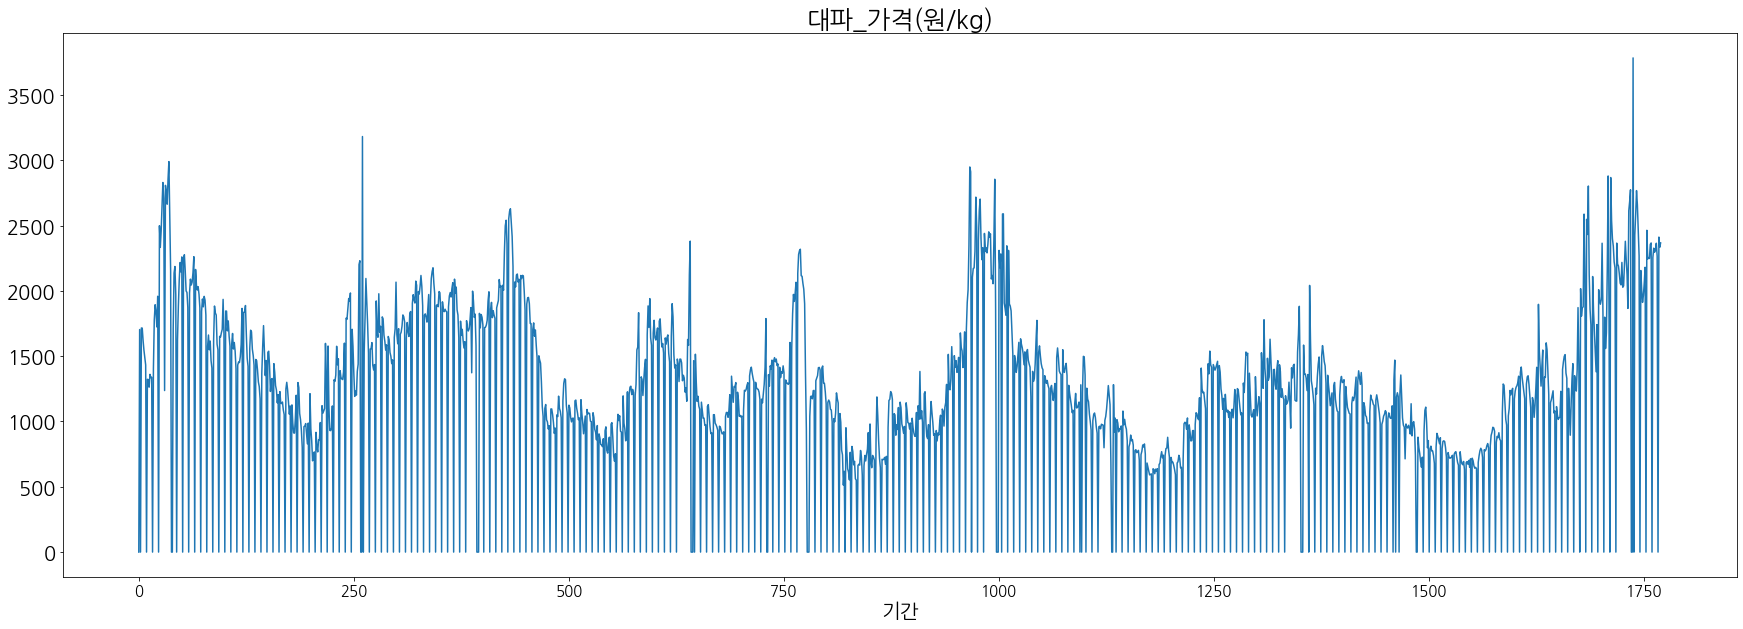

In [36]:
plt.title('대파_가격(원/kg)', fontsize=25)
plt.xlabel('기간', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 20)
대파['대파_가격(원/kg)'].plot(figsize=(30,10))

In [37]:
대파.columns

Index(['date', '대파_거래량(kg)', '대파_가격(원/kg)', '대파_거래량의_1주전_평균', '대파_가격의_1주전_평균',
       '대파_거래량의_2주전_평균', '대파_가격의_2주전_평균', '계절', '요일_0', '요일_1', '요일_2', '요일_3',
       '요일_4', '요일_5', '요일_6'],
      dtype='object')

In [38]:
# train 20190101 ~ 20200928 / test 20200929 ~ 20201104

split = 1733

main_df = df.reset_index()

main_df = pd.DataFrame() # 빈데이터 프레임 생성 
main_df['ds'] = df.reset_index(drop=False)['date'] # 시간 부분 넣기 
main_df['y'] = df.reset_index(drop=False)['대파_가격(원/kg)'] # 가격
main_train_df = main_df[:split]
main_test_df = main_df[split:]

x_col = ['대파_거래량(kg)', '대파_거래량의_1주전_평균',
       '대파_가격의_1주전_평균', '대파_거래량의_2주전_평균', '대파_가격의_2주전_평균', '계절']
X_train_prophet_df = df.reset_index(drop=False)[x_col][:split]
X_test_prophet_df = df.reset_index(drop=False)[x_col][split:] 

yx_train_prophet_df = pd.concat(
    [main_train_df, X_train_prophet_df], axis = 1
)
yx_test_prophet_df = pd.concat(
    [main_test_df, X_test_prophet_df], axis = 1
)
yx_train_prophet_df.head(2) #  Prophet 학습시에는 꼭 df, y, x변수 순서대로 쌓인 df를 밀어넣어야 함
yx_test_prophet_df.shape

(37, 8)

In [39]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(yx_train_prophet_df) 

In [40]:
future_data = prophet.make_future_dataframe(periods = 37, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1765,2020-10-31,1638.190656,1176.346241,2037.003917
1766,2020-11-01,212.514640,-231.511921,578.830975
1767,2020-11-02,1677.314481,1228.094565,2137.353590
1768,2020-11-03,1686.034672,1258.240832,2132.814915
1769,2020-11-04,1669.171524,1205.718450,2102.865348


- ds = 날짜 데이터(시간데이터)
- yhat = 예측 값
- yhat_lower = 예측 데이터 최소값
- yhat_upper = 예측 데이터 최대값

Text(0.5, 1.0, '값 비교')

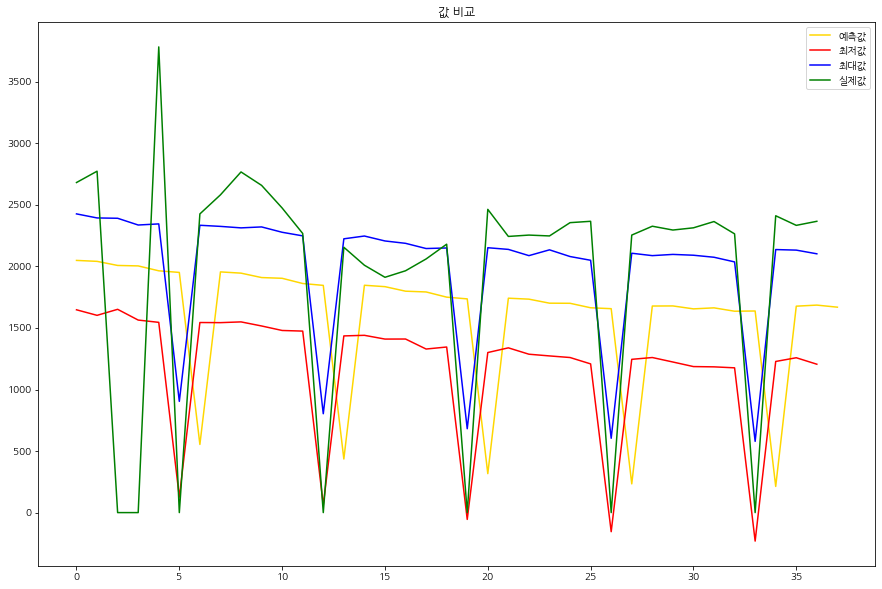

In [41]:
plt.figure(figsize=(15, 10))

# 마지막 37일의 예측 데이터 (2020-09-29 ~ 2020-11-04)
pred_fbprophet_y = forecast_data.yhat.values[-38:]

# 실제 37일의 데이터 (2020-09-29 ~ 2020-11-04)
test_y = yx_test_prophet_df.y.values

# 마지막 37일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-37:]
# 마지막 37일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-37:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [42]:
y_pred = forecast_data.yhat.values[-37:]

In [43]:
test_y.shape

(37,)

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
rmse = round(math.sqrt(mean_squared_error(test_y, y_pred)),2)
r2 = r2_score(test_y, y_pred)

print(rmse)
print(r2)

774.64
0.3770466243677879


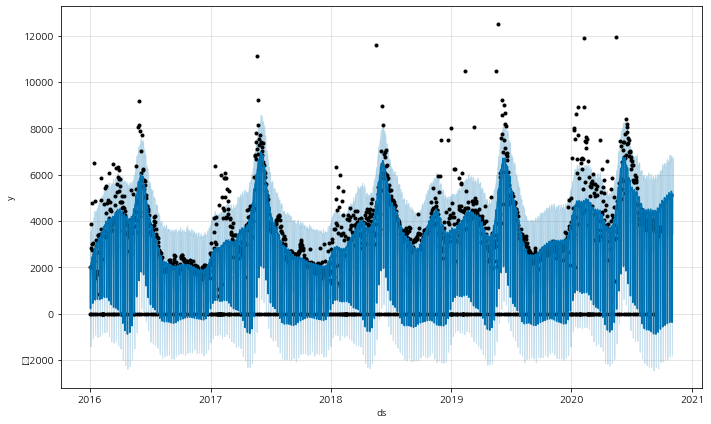

In [ ]:
fig1 = prophet.plot(forecast_data)
# 까만점은 실제데이터, 파란선은 예측값, 하늘색은 신뢰도 85퍼센트의 예측 구간

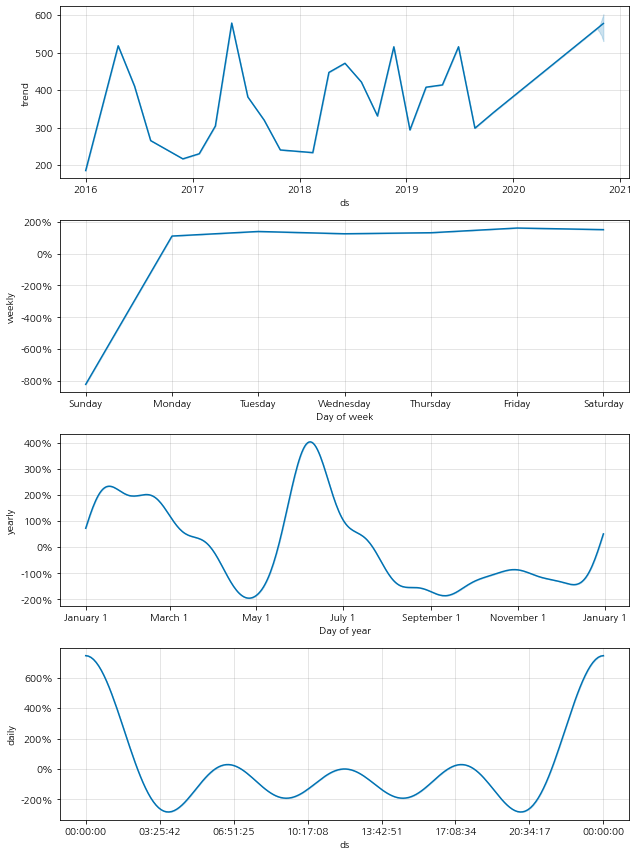

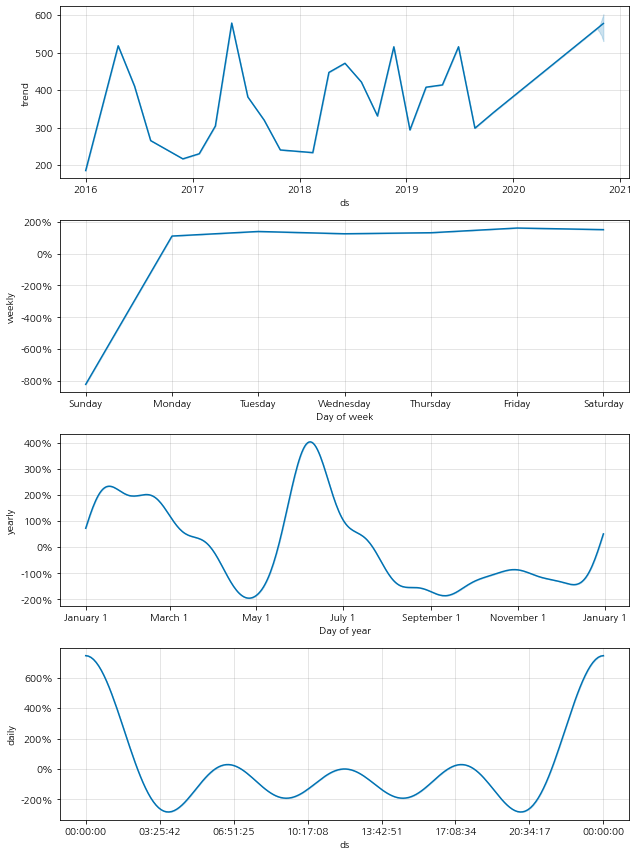

In [ ]:
fig = prophet.plot_components(forecast_data)
fig

In [ ]:
result = pd.DataFrame()
result = forecast_data[['yhat_lower','yhat_upper','yhat']]
temp_df = pd.DataFrame()
temp_df = grape[1733:]
result['real'] = temp_df['캠벨얼리_가격(원/kg)'].reset_index(drop=True)
temp_df.reset_index(inplace=True)
result['time'] = temp_df['date']
result.dropna(inplace=True)
result.set_index('time',drop=True,inplace=True)
result

,yhat_lower,yhat_upper,yhat,real
time,,,,
2020-09-29,467.715480,3513.833810,1981.214573,3937.0
2020-09-30,590.186080,3583.373802,2026.569591,3885.0
2020-10-01,-1408.732418,1738.776058,223.365405,0.0
2020-10-02,603.873378,3563.740341,2077.352861,0.0
2020-10-03,614.586841,3672.142844,2197.703125,0.0
2020-10-04,649.331221,3726.481130,2232.855553,0.0
2020-10-05,759.763111,3897.835800,2308.642130,3895.0
2020-10-06,928.823369,3910.561110,2431.334836,3707.0
2020-10-07,898.733554,3990.414114,2471.111729,3407.0


In [ ]:
# 비교하여 그래프 그려주는 함수 제작 

def vsplot(df):
  plt.plot(df.index,df['yhat'], label='forecast data', color='blue')
  plt.fill_between(df.index,df['yhat_upper'],df['yhat_lower'],color='skyblue',label='80% confidence interval')
  plt.scatter(df.index,df['real'], label='Real data ', color='black')
  plt.legend()
  plt.xlabel('date')
  plt.ylabel('캠벨얼리_가격(원/kg)')
  plt.show()

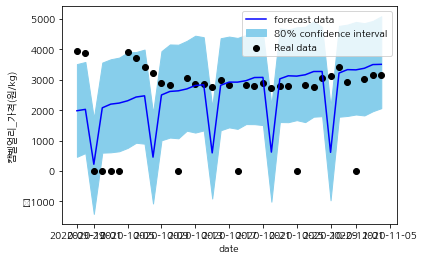

In [ ]:
vsplot(result)

# 2. 대파 ( 전처리 + 원핫요일)

In [20]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

sys_font number: 27


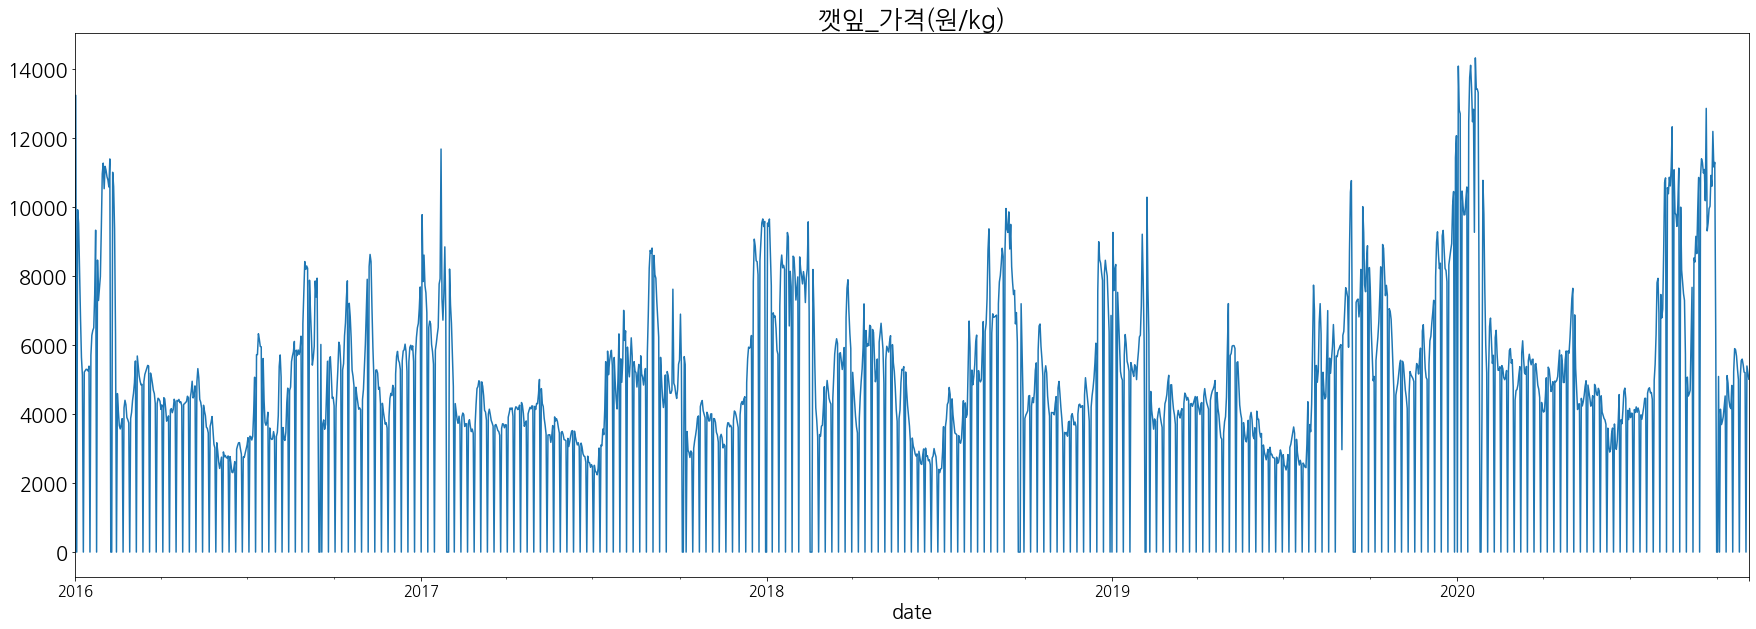

In [21]:
plt.title('깻잎_가격(원/kg)', fontsize=25)
plt.xlabel('기간', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 20)
df['깻잎_가격(원/kg)'].plot(figsize=(30,10))

In [22]:
대파_scaler2.columns

Index(['대파_가격(원/kg)', '대파_거래량(kg)', '대파_거래량의_1주전_평균', '대파_가격의_1주전_평균',
       '대파_거래량의_2주전_평균', '대파_가격의_2주전_평균', '계절', '요일_0', '요일_1', '요일_2', '요일_3',
       '요일_4', '요일_5', '요일_6'],
      dtype='object')

In [23]:
# train 20190101 ~ 20200928 / test 20200929 ~ 20201104

split = 1733

main_df = 대파_scaler2.reset_index()

main_df = pd.DataFrame() # 빈데이터 프레임 생성 
main_df['ds'] = 대파_scaler2.reset_index(drop=False)['date'] # 시간 부분 넣기 
main_df['y'] = 대파_scaler2.reset_index(drop=False)['대파_가격(원/kg)'] # 가격
main_train_df = main_df[:split]
main_test_df = main_df[split:]

x_col = ['대파_거래량(kg)', '대파_거래량의_1주전_평균',
       '대파_가격의_1주전_평균', '대파_거래량의_2주전_평균', '대파_가격의_2주전_평균', '계절','요일_0','요일_1',	'요일_2',	'요일_3'	,'요일_4'	,'요일_5'	,'요일_6']
X_train_prophet_df = 대파_scaler2.reset_index(drop=False)[x_col][:split]
X_test_prophet_df = 대파_scaler2.reset_index(drop=False)[x_col][split:] 

yx_train_prophet_df = pd.concat(
    [main_train_df, X_train_prophet_df], axis = 1
)
yx_test_prophet_df = pd.concat(
    [main_test_df, X_test_prophet_df], axis = 1
)
yx_train_prophet_df.head(2) #  Prophet 학습시에는 꼭 df, y, x변수 순서대로 쌓인 df를 밀어넣어야 함
yx_test_prophet_df.shape

(37, 15)

In [25]:
yx_train_prophet_df

,ds,y,대파_거래량(kg),대파_거래량의_1주전_평균,대파_가격의_1주전_평균,대파_거래량의_2주전_평균,대파_가격의_2주전_평균,계절,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
0,2016-01-01,0.0,-3.701284,-5.440144,-2.071600,-5.653698,-2.139496,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2016-01-02,1704.0,-3.174716,-4.682579,0.649721,-4.862439,0.690285,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016-01-03,0.0,-3.701284,-5.440144,-2.071600,-5.653698,-2.139496,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016-01-04,1716.0,1.969231,2.717941,0.668885,2.867221,0.710213,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-05,1715.0,0.790951,1.022767,0.667288,1.096653,0.708552,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2020-09-24,2380.0,0.691465,-0.176339,1.399863,-0.237359,1.662671,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1729,2020-09-25,2239.0,0.754845,-0.176339,1.399863,-0.237359,1.662671,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1730,2020-09-26,2126.0,0.922669,-0.176339,1.399863,-0.237359,1.662671,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1731,2020-09-27,1866.0,-3.596971,-0.176339,1.399863,-0.237359,1.662671,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
prophet = Prophet(growth='linear', #linear -> 추세를 말함
                  
        # Seasonality
        seasonality_mode='multiplicative', # 계절성 모델: 'additive' or 'multiplicative'
        seasonality_prior_scale=10.0, # 계절성 추정 민감도로 높을수록 민감
        yearly_seasonality='auto', # 연계절성 적용 안할것이라면 False
        weekly_seasonality='auto', # 주계절성
        daily_seasonality='auto', #일계절성
       
        # Holiday
        holidays=None, # 휴일 또는 이벤트 시점 dataframe
        holidays_prior_scale=10.0, # 휴일 추정 민감도로 높을수록 민감
       
        # Others
        interval_width=0.8, # 추세 예측 정확도 구간범위
        mcmc_samples=0) # 계절성 예측 정확도 제어

prophet.add_country_holidays(country_name='KR') #미리 입력된 한국 휴일 불러오기

prophet.fit(yx_train_prophet_df) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(yx_train_prophet_df) 

In [27]:
future_data = prophet.make_future_dataframe(periods = 37, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1765,2020-10-31,1638.190656,1190.159040,2066.019364
1766,2020-11-01,212.514640,-211.923515,560.473982
1767,2020-11-02,1677.314481,1234.665598,2087.918710
1768,2020-11-03,1686.034672,1199.543100,2101.083502
1769,2020-11-04,1669.171524,1213.314745,2110.040274


- ds = 날짜 데이터(시간데이터)
- yhat = 예측 값
- yhat_lower = 예측 데이터 최소값
- yhat_upper = 예측 데이터 최대값

Text(0.5, 1.0, '값 비교')

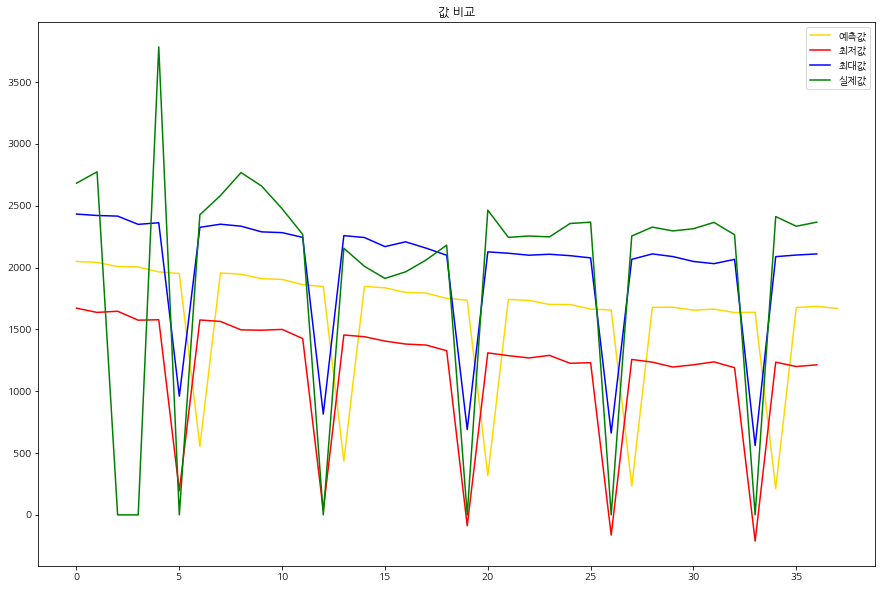

In [28]:
plt.figure(figsize=(15, 10))

# 마지막 37일의 예측 데이터 (2020-09-29 ~ 2020-11-04)
pred_fbprophet_y = forecast_data.yhat.values[-38:]

# 실제 37일의 데이터 (2020-09-29 ~ 2020-11-04)
test_y = yx_test_prophet_df.y.values

# 마지막 37일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-37:]
# 마지막 37일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-37:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [29]:
y_pred = forecast_data.yhat.values[-37:]

In [30]:
test_y.shape

(37,)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-04-02 00:00:00 and 2019-09-29 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-04-03,542.296632,177.628008,932.844754,734.0,2019-04-02
1,2019-04-04,536.947056,137.695650,947.820325,769.0,2019-04-02
2,2019-04-05,520.088634,116.866047,920.364524,722.0,2019-04-02
3,2019-04-06,522.828587,152.942139,903.204069,742.0,2019-04-02
4,2019-04-07,-35.765961,-428.580455,343.670852,0.0,2019-04-02


In [33]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,71860.145521,268.067427,214.831542,0.307261,0.890411
1,38 days,75346.141329,274.492516,218.824172,0.315869,0.876712
2,39 days,78742.828445,280.611526,222.979187,0.319610,0.863014
3,40 days,77960.745191,279.214515,219.345169,0.320007,0.863014
4,41 days,82021.195123,286.393427,224.224523,0.320007,0.849315


In [34]:
rmse = round(math.sqrt(mean_squared_error(test_y, y_pred)),2)
r2 = r2_score(test_y, y_pred)

print(rmse)
print(r2)

774.64
0.3770466243677879


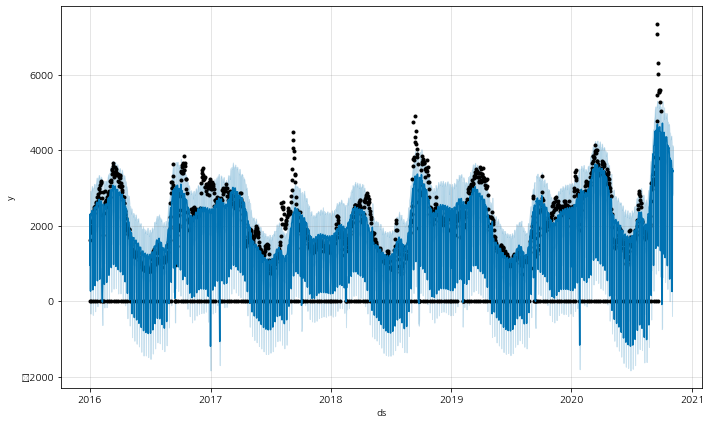

In [ ]:
fig1 = prophet.plot(forecast_data)
# 까만점은 실제데이터, 파란선은 예측값, 하늘색은 신뢰도 85퍼센트의 예측 구간

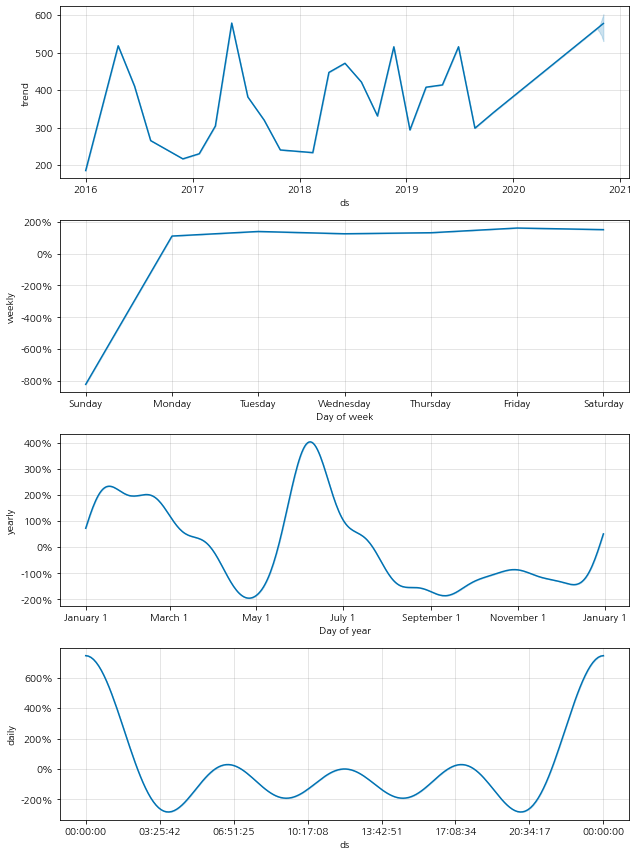

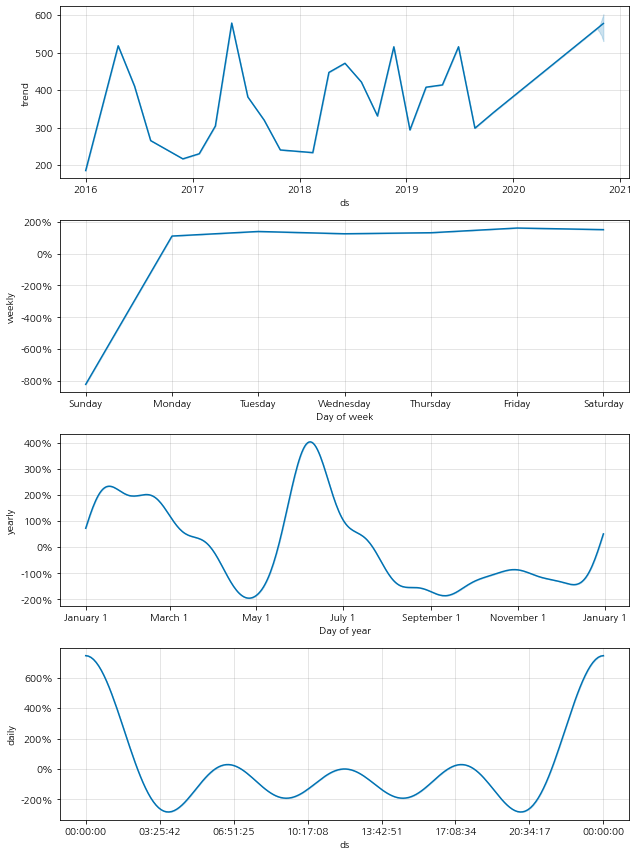

In [ ]:
fig = prophet.plot_components(forecast_data)
fig

In [ ]:
result = pd.DataFrame()
result = forecast_data[['yhat_lower','yhat_upper','yhat']]
temp_df = pd.DataFrame()
temp_df = grape[1733:]
result['real'] = temp_df['캠벨얼리_가격(원/kg)'].reset_index(drop=True)
temp_df.reset_index(inplace=True)
result['time'] = temp_df['date']
result.dropna(inplace=True)
result.set_index('time',drop=True,inplace=True)
result

,yhat_lower,yhat_upper,yhat,real
time,,,,
2020-09-29,467.715480,3513.833810,1981.214573,3937.0
2020-09-30,590.186080,3583.373802,2026.569591,3885.0
2020-10-01,-1408.732418,1738.776058,223.365405,0.0
2020-10-02,603.873378,3563.740341,2077.352861,0.0
2020-10-03,614.586841,3672.142844,2197.703125,0.0
2020-10-04,649.331221,3726.481130,2232.855553,0.0
2020-10-05,759.763111,3897.835800,2308.642130,3895.0
2020-10-06,928.823369,3910.561110,2431.334836,3707.0
2020-10-07,898.733554,3990.414114,2471.111729,3407.0


In [ ]:
# 비교하여 그래프 그려주는 함수 제작 

def vsplot(df):
  plt.plot(df.index,df['yhat'], label='forecast data', color='blue')
  plt.fill_between(df.index,df['yhat_upper'],df['yhat_lower'],color='skyblue',label='80% confidence interval')
  plt.scatter(df.index,df['real'], label='Real data ', color='black')
  plt.legend()
  plt.xlabel('date')
  plt.ylabel('캠벨얼리_가격(원/kg)')
  plt.show()

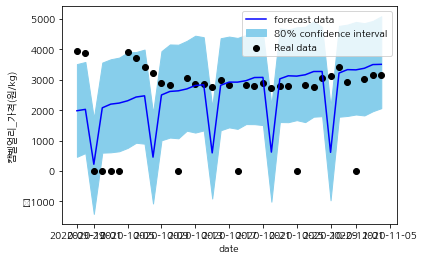

In [ ]:
vsplot(result)

# 3. 대파 ( 전처리 + 파라미터 )

In [ ]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

sys_font number: 27


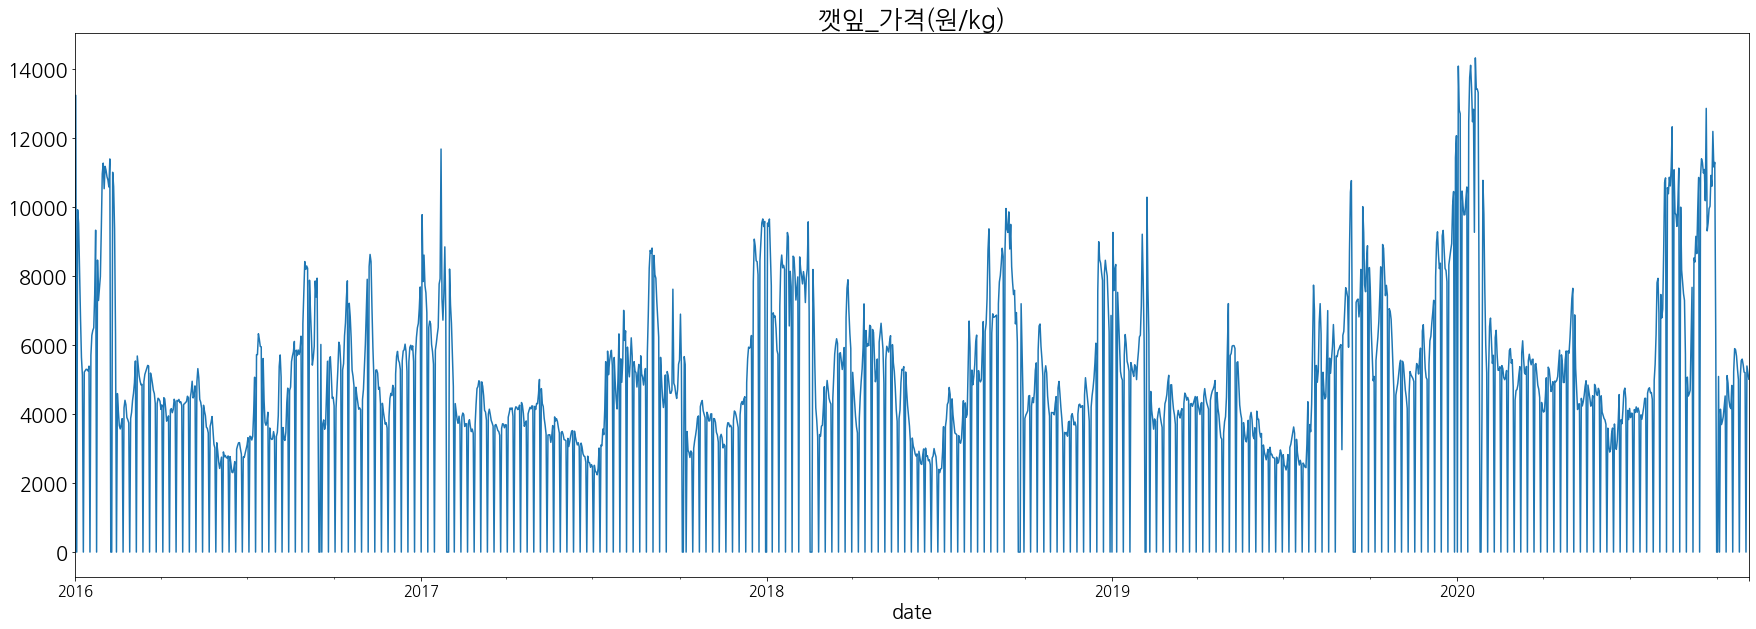

In [ ]:
plt.title('깻잎_가격(원/kg)', fontsize=25)
plt.xlabel('기간', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 20)
df['깻잎_가격(원/kg)'].plot(figsize=(30,10))

In [ ]:
대파_scaler2.columns

Index(['대파_가격(원/kg)', '대파_거래량(kg)', '대파_거래량의_1주전_평균', '대파_가격의_1주전_평균',
       '대파_거래량의_2주전_평균', '대파_가격의_2주전_평균', '계절', '요일_0', '요일_1', '요일_2', '요일_3',
       '요일_4', '요일_5', '요일_6'],
      dtype='object')

In [ ]:
# train 20190101 ~ 20200928 / test 20200929 ~ 20201104

split = 1733

main_df = 대파_scaler2.reset_index()

main_df = pd.DataFrame() # 빈데이터 프레임 생성 
main_df['ds'] = 대파_scaler2.reset_index(drop=False)['date'] # 시간 부분 넣기 
main_df['y'] = 대파_scaler2.reset_index(drop=False)['대파_가격(원/kg)'] # 가격
main_train_df = main_df[:split]
main_test_df = main_df[split:]

x_col = ['대파_거래량(kg)', '대파_거래량의_1주전_평균',
       '대파_가격의_1주전_평균', '대파_거래량의_2주전_평균', '대파_가격의_2주전_평균', '계절','요일_0','요일_1',	'요일_2',	'요일_3'	,'요일_4'	,'요일_5'	,'요일_6']
X_train_prophet_df = 대파_scaler2.reset_index(drop=False)[x_col][:split]
X_test_prophet_df = 대파_scaler2.reset_index(drop=False)[x_col][split:] 

yx_train_prophet_df = pd.concat(
    [main_train_df, X_train_prophet_df], axis = 1
)
yx_test_prophet_df = pd.concat(
    [main_test_df, X_test_prophet_df], axis = 1
)
yx_train_prophet_df.head(2) #  Prophet 학습시에는 꼭 df, y, x변수 순서대로 쌓인 df를 밀어넣어야 함
yx_test_prophet_df.shape

(37, 15)

In [ ]:
yx_train_prophet_df

,ds,y,대파_거래량(kg),대파_거래량의_1주전_평균,대파_가격의_1주전_평균,대파_거래량의_2주전_평균,대파_가격의_2주전_평균,계절,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
0,2016-01-01,0.0,-3.701284,-5.440144,-2.071600,-5.653698,-2.139496,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2016-01-02,1704.0,-3.174716,-4.682579,0.649721,-4.862439,0.690285,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016-01-03,0.0,-3.701284,-5.440144,-2.071600,-5.653698,-2.139496,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016-01-04,1716.0,1.969231,2.717941,0.668885,2.867221,0.710213,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-05,1715.0,0.790951,1.022767,0.667288,1.096653,0.708552,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2020-09-24,2380.0,0.691465,-0.176339,1.399863,-0.237359,1.662671,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1729,2020-09-25,2239.0,0.754845,-0.176339,1.399863,-0.237359,1.662671,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1730,2020-09-26,2126.0,0.922669,-0.176339,1.399863,-0.237359,1.662671,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1731,2020-09-27,1866.0,-3.596971,-0.176339,1.399863,-0.237359,1.662671,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
prophet = Prophet(growth='linear', #linear -> 추세를 말함
                  
        # Seasonality
        seasonality_mode='multiplicative', # 계절성 모델: 'additive' or 'multiplicative'
        seasonality_prior_scale=10.0, # 계절성 추정 민감도로 높을수록 민감
        yearly_seasonality='auto', # 연계절성 적용 안할것이라면 False
        weekly_seasonality='auto', # 주계절성
        daily_seasonality='auto', #일계절성
       
        # Holiday
        holidays=None, # 휴일 또는 이벤트 시점 dataframe
        holidays_prior_scale=10.0, # 휴일 추정 민감도로 높을수록 민감
       
        # Others
        interval_width=0.8, # 추세 예측 정확도 구간범위
        mcmc_samples=0) # 계절성 예측 정확도 제어

prophet.add_country_holidays(country_name='KR') #미리 입력된 한국 휴일 불러오기

prophet.fit(yx_train_prophet_df) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_data = prophet.make_future_dataframe(periods = 37, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1765,2020-10-31,1638.190656,1190.159040,2066.019364
1766,2020-11-01,212.514640,-211.923515,560.473982
1767,2020-11-02,1677.314481,1234.665598,2087.918710
1768,2020-11-03,1686.034672,1199.543100,2101.083502
1769,2020-11-04,1669.171524,1213.314745,2110.040274


- ds = 날짜 데이터(시간데이터)
- yhat = 예측 값
- yhat_lower = 예측 데이터 최소값
- yhat_upper = 예측 데이터 최대값

Text(0.5, 1.0, '값 비교')

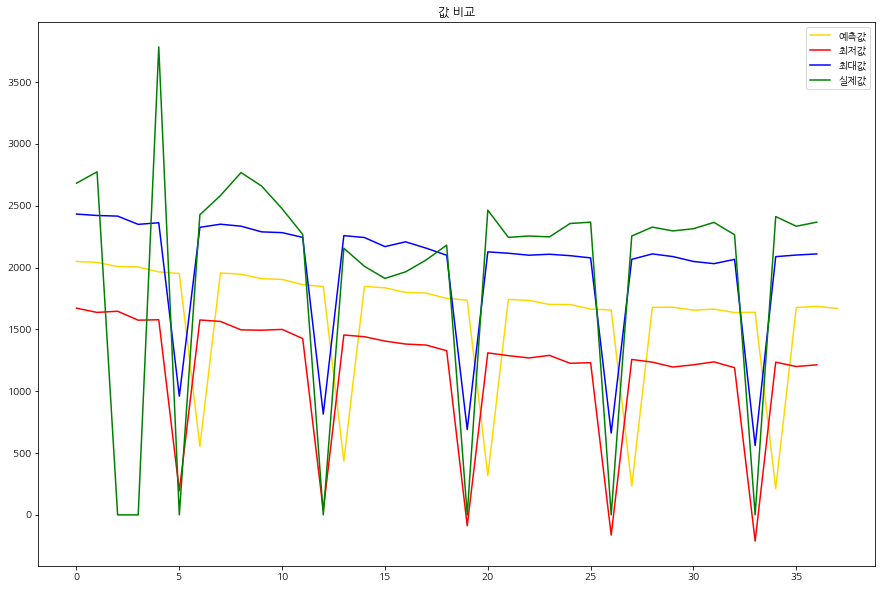

In [ ]:
plt.figure(figsize=(15, 10))

# 마지막 37일의 예측 데이터 (2020-09-29 ~ 2020-11-04)
pred_fbprophet_y = forecast_data.yhat.values[-38:]

# 실제 37일의 데이터 (2020-09-29 ~ 2020-11-04)
test_y = yx_test_prophet_df.y.values

# 마지막 37일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-37:]
# 마지막 37일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-37:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [ ]:
y_pred = forecast_data.yhat.values[-37:]

In [ ]:
test_y.shape

(37,)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,71860.145521,268.067427,214.831542,0.307261,0.890411
1,38 days,75346.141329,274.492516,218.824172,0.315869,0.876712
2,39 days,78742.828445,280.611526,222.979187,0.319610,0.863014
3,40 days,77960.745191,279.214515,219.345169,0.320007,0.863014
4,41 days,82021.195123,286.393427,224.224523,0.320007,0.849315


In [ ]:
rmse = round(math.sqrt(mean_squared_error(test_y, y_pred)),2)
r2 = r2_score(test_y, y_pred)

print(rmse)
print(r2)

774.64
0.3770466243677879


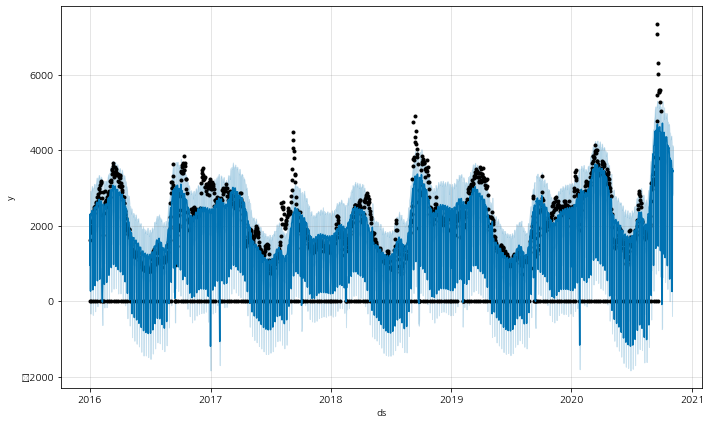

In [ ]:
fig1 = prophet.plot(forecast_data)
# 까만점은 실제데이터, 파란선은 예측값, 하늘색은 신뢰도 85퍼센트의 예측 구간

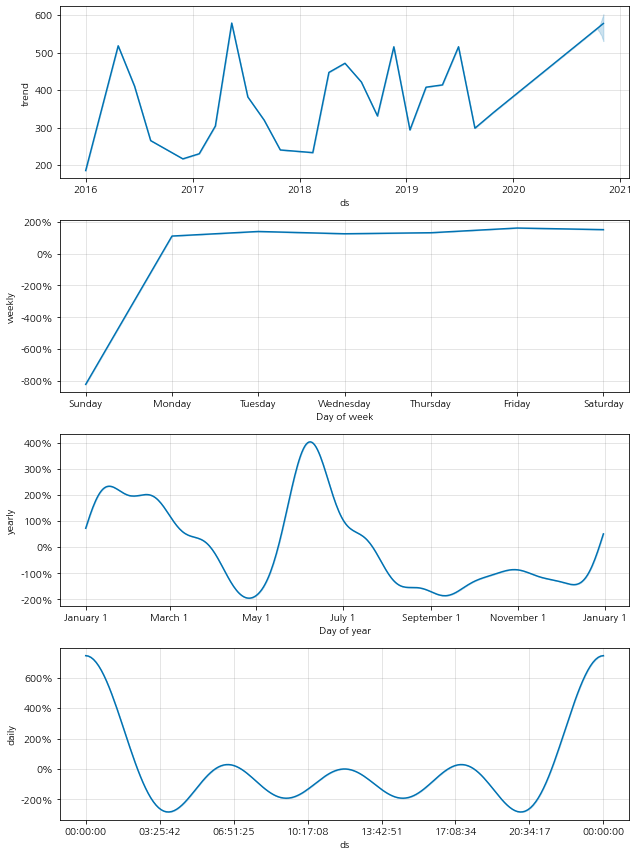

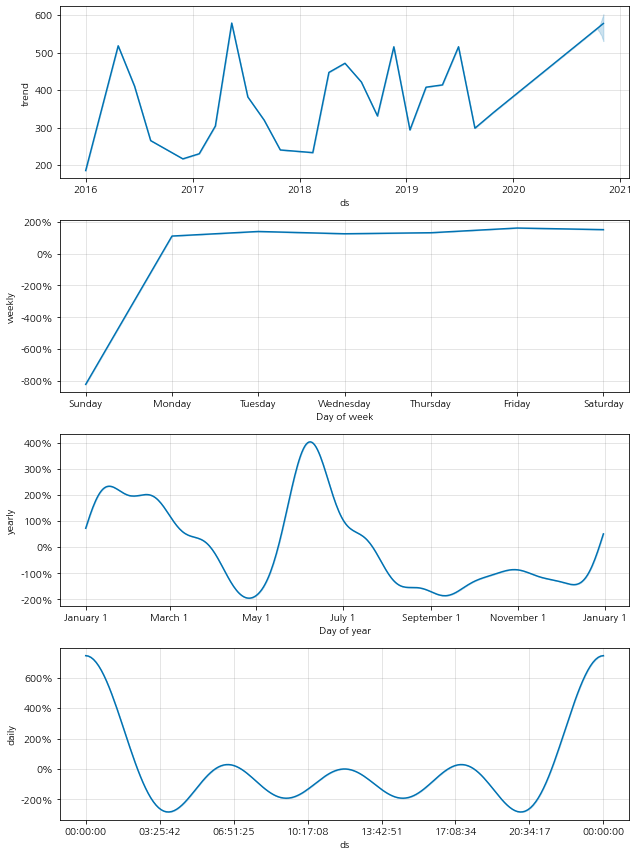

In [ ]:
fig = prophet.plot_components(forecast_data)
fig

In [ ]:
result = pd.DataFrame()
result = forecast_data[['yhat_lower','yhat_upper','yhat']]
temp_df = pd.DataFrame()
temp_df = grape[1733:]
result['real'] = temp_df['캠벨얼리_가격(원/kg)'].reset_index(drop=True)
temp_df.reset_index(inplace=True)
result['time'] = temp_df['date']
result.dropna(inplace=True)
result.set_index('time',drop=True,inplace=True)
result

,yhat_lower,yhat_upper,yhat,real
time,,,,
2020-09-29,467.715480,3513.833810,1981.214573,3937.0
2020-09-30,590.186080,3583.373802,2026.569591,3885.0
2020-10-01,-1408.732418,1738.776058,223.365405,0.0
2020-10-02,603.873378,3563.740341,2077.352861,0.0
2020-10-03,614.586841,3672.142844,2197.703125,0.0
2020-10-04,649.331221,3726.481130,2232.855553,0.0
2020-10-05,759.763111,3897.835800,2308.642130,3895.0
2020-10-06,928.823369,3910.561110,2431.334836,3707.0
2020-10-07,898.733554,3990.414114,2471.111729,3407.0


In [ ]:
# 비교하여 그래프 그려주는 함수 제작 

def vsplot(df):
  plt.plot(df.index,df['yhat'], label='forecast data', color='blue')
  plt.fill_between(df.index,df['yhat_upper'],df['yhat_lower'],color='skyblue',label='80% confidence interval')
  plt.scatter(df.index,df['real'], label='Real data ', color='black')
  plt.legend()
  plt.xlabel('date')
  plt.ylabel('캠벨얼리_가격(원/kg)')
  plt.show()

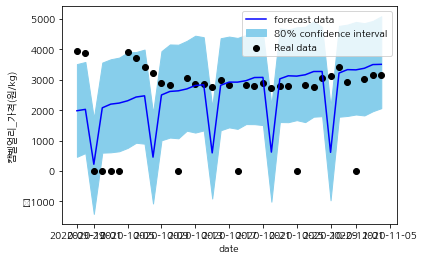

In [ ]:
vsplot(result)

# 4. 대파 ( 전처리 안함 + 파라미터 )

In [ ]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

In [46]:
# train 20190101 ~ 20200928 / test 20200929 ~ 20201104

split = 1733

main_df = df.reset_index()

main_df = pd.DataFrame() # 빈데이터 프레임 생성 
main_df['ds'] = df.reset_index(drop=False)['date'] # 시간 부분 넣기 
main_df['y'] = df.reset_index(drop=False)['대파_가격(원/kg)'] # 가격
main_train_df = main_df[:split]
main_test_df = main_df[split:]

x_col = ['대파_거래량(kg)', '대파_거래량의_1주전_평균',
       '대파_가격의_1주전_평균', '대파_거래량의_2주전_평균', '대파_가격의_2주전_평균', '계절']
X_train_prophet_df = df.reset_index(drop=False)[x_col][:split]
X_test_prophet_df = df.reset_index(drop=False)[x_col][split:] 

yx_train_prophet_df = pd.concat(
    [main_train_df, X_train_prophet_df], axis = 1
)
yx_test_prophet_df = pd.concat(
    [main_test_df, X_test_prophet_df], axis = 1
)
yx_train_prophet_df.head(2) #  Prophet 학습시에는 꼭 df, y, x변수 순서대로 쌓인 df를 밀어넣어야 함
yx_test_prophet_df.shape

(37, 8)

In [47]:
prophet = Prophet(growth='linear', #linear -> 추세를 말함
                  
        # Seasonality
        seasonality_mode='multiplicative', # 계절성 모델: 'additive' or 'multiplicative'
        seasonality_prior_scale=10.0, # 계절성 추정 민감도로 높을수록 민감
        yearly_seasonality='auto', # 연계절성 적용 안할것이라면 False
        weekly_seasonality='auto', # 주계절성
        daily_seasonality='auto', #일계절성
       
        # Holiday
        holidays=None, # 휴일 또는 이벤트 시점 dataframe
        holidays_prior_scale=10.0, # 휴일 추정 민감도로 높을수록 민감
       
        # Others
        interval_width=0.8, # 추세 예측 정확도 구간범위
        mcmc_samples=0) # 계절성 예측 정확도 제어

prophet.add_country_holidays(country_name='KR') #미리 입력된 한국 휴일 불러오기

prophet.fit(yx_train_prophet_df) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future_data = prophet.make_future_dataframe(periods = 37, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1765,2020-10-31,1592.089662,1194.180756,2008.449565
1766,2020-11-01,160.197188,-254.610314,567.713947
1767,2020-11-02,1662.137658,1259.960178,2081.457024
1768,2020-11-03,1666.378697,1276.424727,2094.212235
1769,2020-11-04,1653.002335,1241.465845,2076.192806


- ds = 날짜 데이터(시간데이터)
- yhat = 예측 값
- yhat_lower = 예측 데이터 최소값
- yhat_upper = 예측 데이터 최대값

Text(0.5, 1.0, '값 비교')

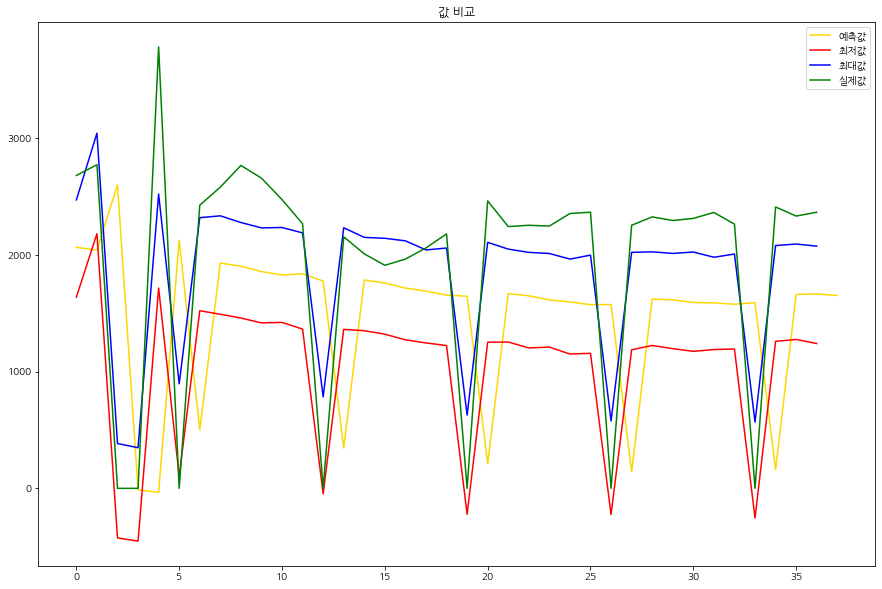

In [49]:
plt.figure(figsize=(15, 10))

# 마지막 37일의 예측 데이터 (2020-09-29 ~ 2020-11-04)
pred_fbprophet_y = forecast_data.yhat.values[-38:]

# 실제 37일의 데이터 (2020-09-29 ~ 2020-11-04)
test_y = yx_test_prophet_df.y.values

# 마지막 37일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-37:]
# 마지막 37일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-37:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [50]:
y_pred = forecast_data.yhat.values[-37:]

In [51]:
test_y.shape

(37,)

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [53]:
rmse = round(math.sqrt(mean_squared_error(test_y, y_pred)),2)
r2 = r2_score(test_y, y_pred)

print(rmse)
print(r2)

633.27
0.5836680345978713


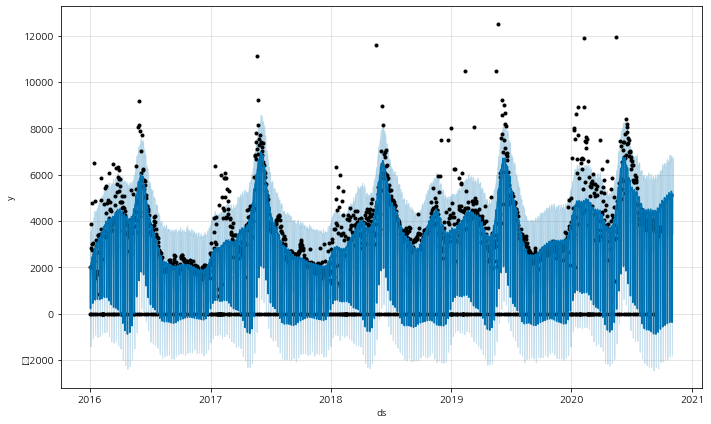

In [ ]:
fig1 = prophet.plot(forecast_data)
# 까만점은 실제데이터, 파란선은 예측값, 하늘색은 신뢰도 85퍼센트의 예측 구간

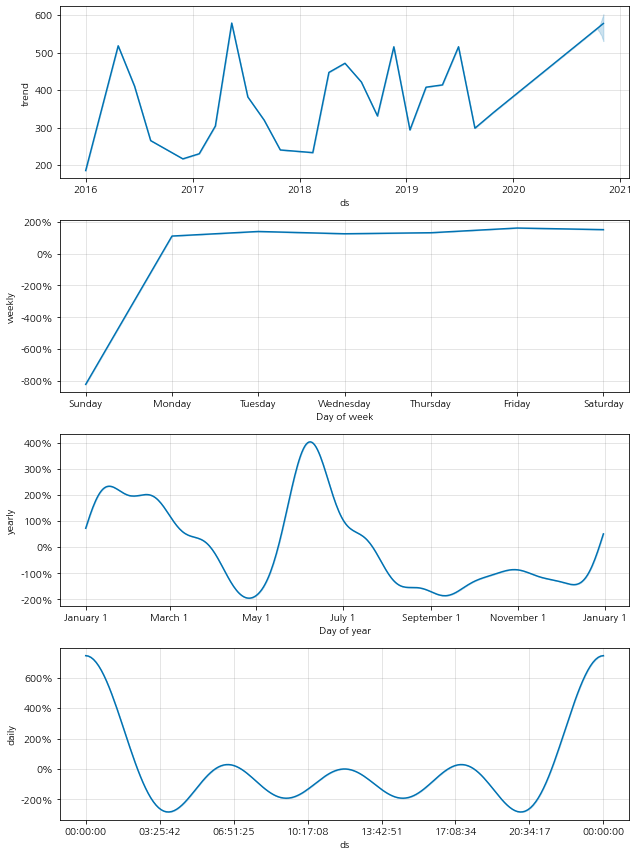

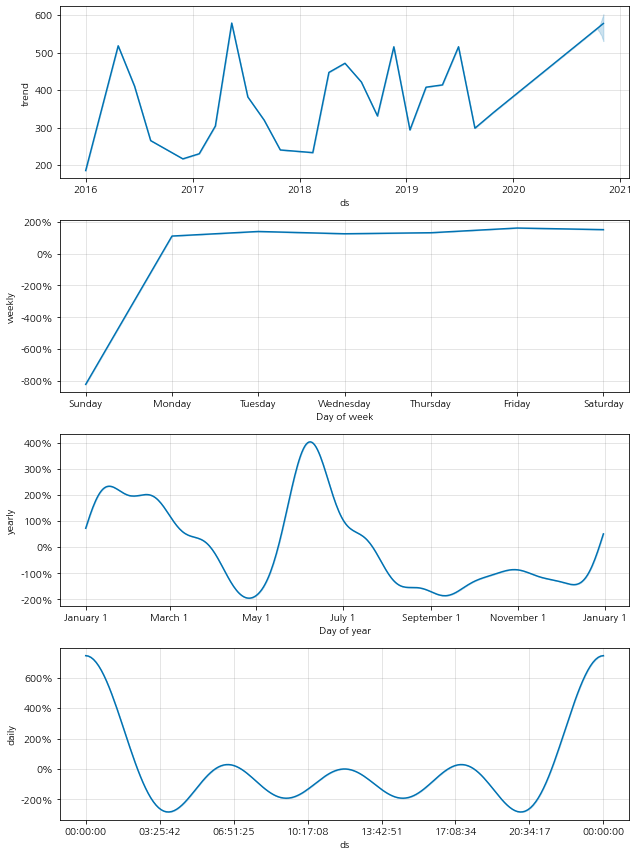

In [ ]:
fig = prophet.plot_components(forecast_data)
fig

In [ ]:
result = pd.DataFrame()
result = forecast_data[['yhat_lower','yhat_upper','yhat']]
temp_df = pd.DataFrame()
temp_df = grape[1733:]
result['real'] = temp_df['캠벨얼리_가격(원/kg)'].reset_index(drop=True)
temp_df.reset_index(inplace=True)
result['time'] = temp_df['date']
result.dropna(inplace=True)
result.set_index('time',drop=True,inplace=True)
result

,yhat_lower,yhat_upper,yhat,real
time,,,,
2020-09-29,467.715480,3513.833810,1981.214573,3937.0
2020-09-30,590.186080,3583.373802,2026.569591,3885.0
2020-10-01,-1408.732418,1738.776058,223.365405,0.0
2020-10-02,603.873378,3563.740341,2077.352861,0.0
2020-10-03,614.586841,3672.142844,2197.703125,0.0
2020-10-04,649.331221,3726.481130,2232.855553,0.0
2020-10-05,759.763111,3897.835800,2308.642130,3895.0
2020-10-06,928.823369,3910.561110,2431.334836,3707.0
2020-10-07,898.733554,3990.414114,2471.111729,3407.0


In [ ]:
# 비교하여 그래프 그려주는 함수 제작 

def vsplot(df):
  plt.plot(df.index,df['yhat'], label='forecast data', color='blue')
  plt.fill_between(df.index,df['yhat_upper'],df['yhat_lower'],color='skyblue',label='80% confidence interval')
  plt.scatter(df.index,df['real'], label='Real data ', color='black')
  plt.legend()
  plt.xlabel('date')
  plt.ylabel('캠벨얼리_가격(원/kg)')
  plt.show()

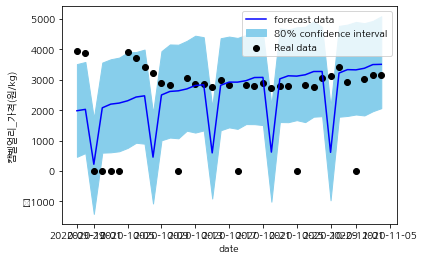

In [ ]:
vsplot(result)

# 5. 대파 ( 전처리 [요일제외]+ 파라미터 )



In [54]:
# train 20190101 ~ 20200928 / test 20200929 ~ 20201104

split = 1733

main_df = 대파_scaler2.reset_index()

main_df = pd.DataFrame() # 빈데이터 프레임 생성 
main_df['ds'] = 대파_scaler2.reset_index(drop=False)['date'] # 시간 부분 넣기 
main_df['y'] = 대파_scaler2.reset_index(drop=False)['대파_가격(원/kg)'] # 가격
main_train_df = main_df[:split]
main_test_df = main_df[split:]

x_col = ['대파_거래량(kg)', '대파_거래량의_1주전_평균',
       '대파_가격의_1주전_평균', '대파_거래량의_2주전_평균', '대파_가격의_2주전_평균', '계절']
X_train_prophet_df = 대파_scaler2.reset_index(drop=False)[x_col][:split]
X_test_prophet_df = 대파_scaler2.reset_index(drop=False)[x_col][split:] 

yx_train_prophet_df = pd.concat(
    [main_train_df, X_train_prophet_df], axis = 1
)
yx_test_prophet_df = pd.concat(
    [main_test_df, X_test_prophet_df], axis = 1
)
yx_train_prophet_df.head(2) #  Prophet 학습시에는 꼭 df, y, x변수 순서대로 쌓인 df를 밀어넣어야 함
yx_test_prophet_df.shape

(37, 8)

In [55]:
yx_train_prophet_df

,ds,y,대파_거래량(kg),대파_거래량의_1주전_평균,대파_가격의_1주전_평균,대파_거래량의_2주전_평균,대파_가격의_2주전_평균,계절
0,2016-01-01,0.0,-3.701284,-5.440144,-2.071600,-5.653698,-2.139496,-1.0
1,2016-01-02,1704.0,-3.174716,-4.682579,0.649721,-4.862439,0.690285,-1.0
2,2016-01-03,0.0,-3.701284,-5.440144,-2.071600,-5.653698,-2.139496,-1.0
3,2016-01-04,1716.0,1.969231,2.717941,0.668885,2.867221,0.710213,-1.0
4,2016-01-05,1715.0,0.790951,1.022767,0.667288,1.096653,0.708552,-1.0
...,...,...,...,...,...,...,...,...
1728,2020-09-24,2380.0,0.691465,-0.176339,1.399863,-0.237359,1.662671,2.0
1729,2020-09-25,2239.0,0.754845,-0.176339,1.399863,-0.237359,1.662671,2.0
1730,2020-09-26,2126.0,0.922669,-0.176339,1.399863,-0.237359,1.662671,2.0
1731,2020-09-27,1866.0,-3.596971,-0.176339,1.399863,-0.237359,1.662671,2.0


In [64]:
prophet = Prophet(growth='linear', #linear -> 추세를 말함
                  
        # Seasonality
        seasonality_mode='multiplicative', # 계절성 모델: 'additive' or 'multiplicative'
        seasonality_prior_scale=10.0, # 계절성 추정 민감도로 높을수록 민감
        yearly_seasonality='auto', # 연계절성 적용 안할것이라면 False
        weekly_seasonality='auto', # 주계절성
        daily_seasonality='auto', #일계절성
       
        # Holiday
        holidays=None, # 휴일 또는 이벤트 시점 dataframe
        holidays_prior_scale=10.0, # 휴일 추정 민감도로 높을수록 민감
       
        # Others
        interval_width=0.8, # 추세 예측 정확도 구간범위
        mcmc_samples=0) # 계절성 예측 정확도 제어

prophet.add_country_holidays(country_name='KR') #미리 입력된 한국 휴일 불러오기

prophet.fit(yx_train_prophet_df) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [65]:
future_data = prophet.make_future_dataframe(periods = 37, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1765,2020-10-31,1592.089662,1196.177121,1989.593457
1766,2020-11-01,160.197188,-245.668569,557.629046
1767,2020-11-02,1662.137658,1255.722810,2074.104588
1768,2020-11-03,1666.378697,1238.393267,2063.291443
1769,2020-11-04,1653.002335,1208.575288,2053.888775


- ds = 날짜 데이터(시간데이터)
- yhat = 예측 값
- yhat_lower = 예측 데이터 최소값
- yhat_upper = 예측 데이터 최대값

Text(0.5, 1.0, '값 비교')

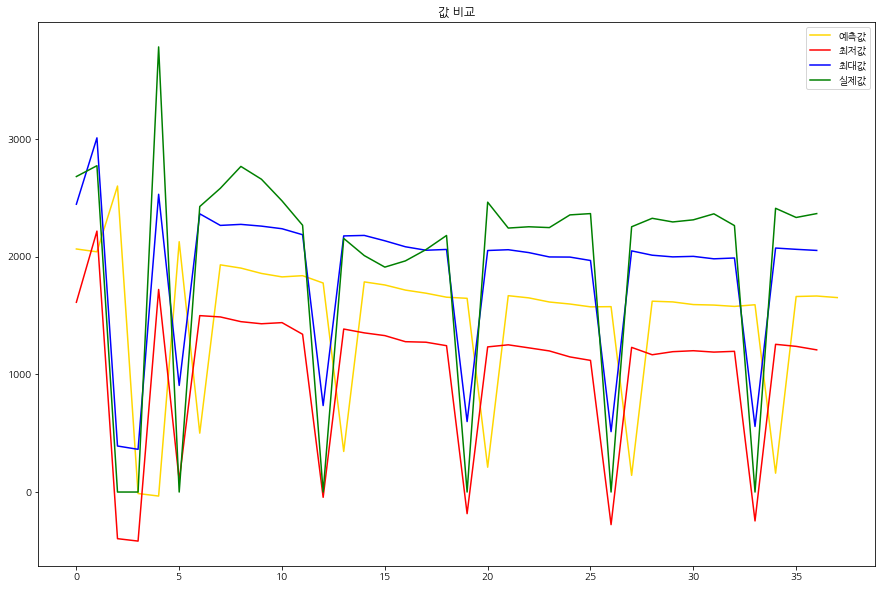

In [66]:
plt.figure(figsize=(15, 10))

# 마지막 37일의 예측 데이터 (2020-09-29 ~ 2020-11-04)
pred_fbprophet_y = forecast_data.yhat.values[-38:]

# 실제 37일의 데이터 (2020-09-29 ~ 2020-11-04)
test_y = yx_test_prophet_df.y.values

# 마지막 37일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-37:]
# 마지막 37일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-37:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [67]:
y_pred = forecast_data.yhat.values[-37:]

In [68]:
test_y.shape

(37,)

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [70]:
rmse = round(math.sqrt(mean_squared_error(test_y, y_pred)),2)
r2 = r2_score(test_y, y_pred)

print(rmse)
print(r2)

633.27
0.5836680345978713


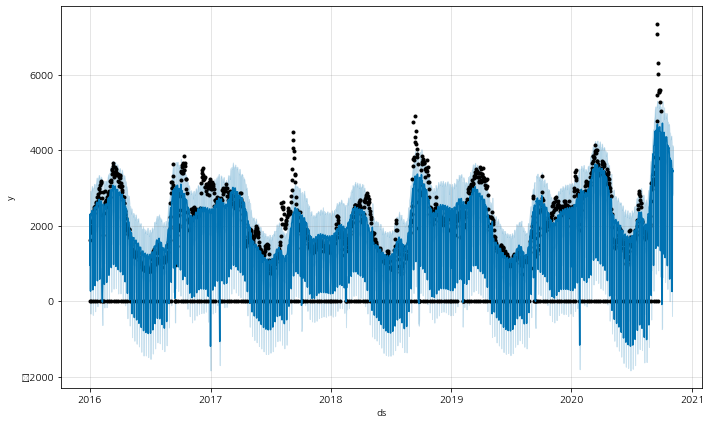

In [ ]:
fig1 = prophet.plot(forecast_data)
# 까만점은 실제데이터, 파란선은 예측값, 하늘색은 신뢰도 85퍼센트의 예측 구간

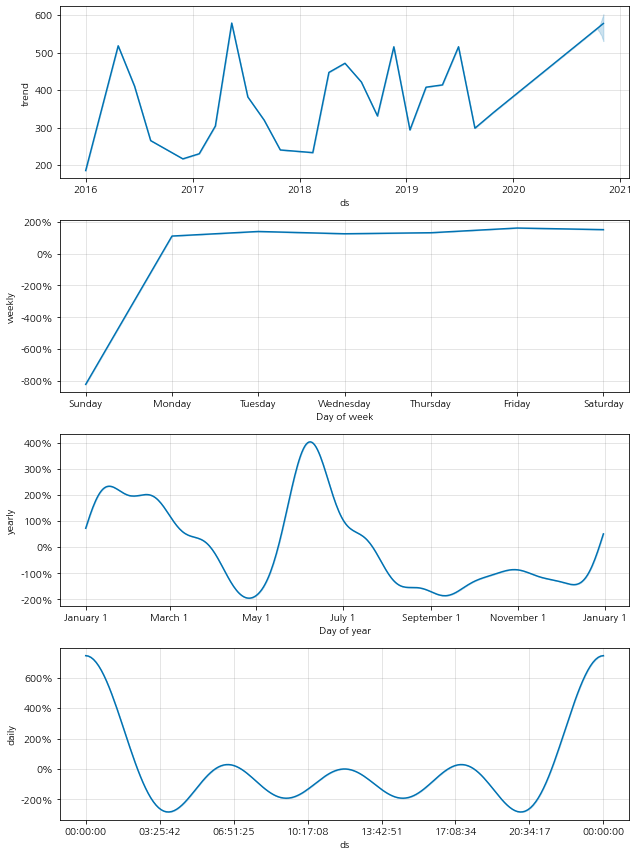

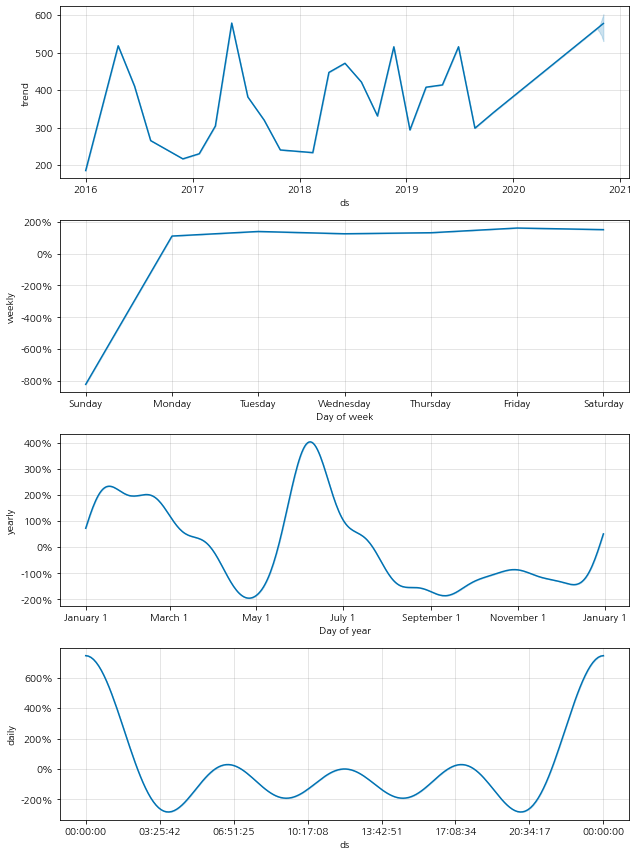

In [ ]:
fig = prophet.plot_components(forecast_data)
fig

In [ ]:
result = pd.DataFrame()
result = forecast_data[['yhat_lower','yhat_upper','yhat']]
temp_df = pd.DataFrame()
temp_df = grape[1733:]
result['real'] = temp_df['캠벨얼리_가격(원/kg)'].reset_index(drop=True)
temp_df.reset_index(inplace=True)
result['time'] = temp_df['date']
result.dropna(inplace=True)
result.set_index('time',drop=True,inplace=True)
result

,yhat_lower,yhat_upper,yhat,real
time,,,,
2020-09-29,467.715480,3513.833810,1981.214573,3937.0
2020-09-30,590.186080,3583.373802,2026.569591,3885.0
2020-10-01,-1408.732418,1738.776058,223.365405,0.0
2020-10-02,603.873378,3563.740341,2077.352861,0.0
2020-10-03,614.586841,3672.142844,2197.703125,0.0
2020-10-04,649.331221,3726.481130,2232.855553,0.0
2020-10-05,759.763111,3897.835800,2308.642130,3895.0
2020-10-06,928.823369,3910.561110,2431.334836,3707.0
2020-10-07,898.733554,3990.414114,2471.111729,3407.0


In [ ]:
# 비교하여 그래프 그려주는 함수 제작 

def vsplot(df):
  plt.plot(df.index,df['yhat'], label='forecast data', color='blue')
  plt.fill_between(df.index,df['yhat_upper'],df['yhat_lower'],color='skyblue',label='80% confidence interval')
  plt.scatter(df.index,df['real'], label='Real data ', color='black')
  plt.legend()
  plt.xlabel('date')
  plt.ylabel('캠벨얼리_가격(원/kg)')
  plt.show()

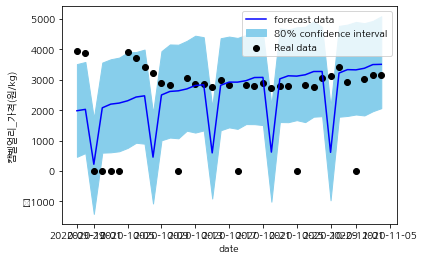

In [ ]:
vsplot(result)